
# 作業: 
    
    (1)以, Adam, 為例, 調整 batch_size, epoch , 觀察accurancy, loss 的變化
    
    (2)以同一模型, 分別驗證 SGD, Adam, Rmsprop 的 accurancy

In [1]:
import keras
#from keras.datasets import cifar10
from keras.datasets import mnist 
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

%matplotlib inline

Using TensorFlow backend.


In [2]:
# 第四步：資料分割
# 使用Keras自帶的mnist工具讀取數據（第一次需要聯網）
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

# 由於mist的輸入數據維度是(num, 28 , 28)，這裡需要把後面的維度直接拼起來變成784維   
X_train = numpy.array(X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2 ]))/256
X_test = numpy.array(X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2 ]))/256  
Y_train = (numpy.arange(10) == y_train[:, None]).astype(int)
Y_test = (numpy.arange(10) == y_test[:, None]).astype(int)

In [3]:
# 第五步：訓練, 修正 model 參數
#Blas GEMM launch failed , 避免動態分配GPU / CPU, 出現問題
import tensorflow as tf
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

In [4]:
def model1(batchsize = 128, epochs = 20, optimizer = 'adam'):
    #    第一步：選擇模型, 順序模型是多個網絡層的線性堆疊
    model = Sequential()

    #   第二步：構建網絡層 
    model.add(Dense( 500,input_shape=(784,))) # 輸入層，28*28=784   
    model.add(Activation('relu')) # 激活函數是relu   

    model.add(Dense( 500)) # 隱藏層節點500個   
    model.add(Activation('relu'))  

    model.add(Dense( 500)) # 隱藏層節點500個   
    model.add(Activation('relu'))  

    model.add(Dense( 500)) # 隱藏層節點500個   
    model.add(Activation('relu'))  

    model.add(Dense( 10)) # 輸出結果是10個類別，所以維度是10   
    model.add(Activation('softmax')) # 最後一層用softmax作為激活函數
    
    # 模型建立完成後，統計參數總量
    print("Total Parameters：%d" % model.count_params())
    
    # 輸出模型摘要資訊
    print(model.summary())
    
    #第三步編譯
    model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    history = model.fit(X_train,Y_train,batch_size = batchsize, epochs=epochs, shuffle=True,verbose=2,validation_split=0.3)
    
    #    第六步：輸出 
    print ( "" )
    print ( " test set " )
    scores = model.evaluate(X_test,Y_test,batch_size=200,verbose= 0)
    print ( "" )
    #print ( " The test loss is %f " % scores)
    print ( " The test loss is %f ", scores)
    result = model.predict(X_test,batch_size=200,verbose= 0)

    result_max = numpy.argmax(result, axis = 1 )
    test_max = numpy.argmax(Y_test, axis = 1 )

    result_bool = numpy.equal(result_max, test_max)
    true_num = numpy.sum(result_bool)
    print ( "" )
    print ( " The accuracy of the model is %f " % (true_num/len(result_bool)))
    
    print(confusion_matrix(Y_test.argmax(axis=1), result.argmax(axis=1)))
    
    # Plot training & validation accuracy values
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

## 範例模型 batchsize = 128, epochs = 20, optimizer = 'adam'

Total Parameters：1149010
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 500)               392500    
_________________________________________________________________
activation_36 (Activation)   (None, 500)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 500)               250500    
_________________________________________________________________
activation_37 (Activation)   (None, 500)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 500)               250500    
_________________________________________________________________
activation_38 (Activation)   (None, 500)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 500)           

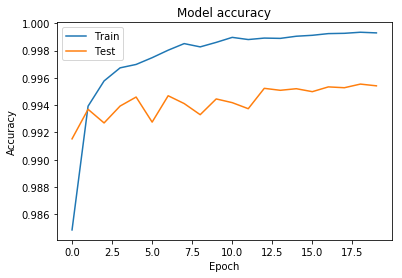

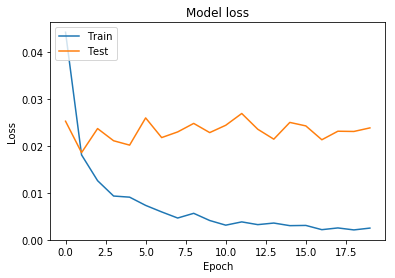

In [13]:
# batchsize = 128, epochs = 20
model1()

# (1)以, Adam, 為例, 調整 batch_size, epoch , 觀察accurancy, loss 的變化

Total Parameters：1149010
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 500)               392500    
_________________________________________________________________
activation_6 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_7 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_8 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 500)           

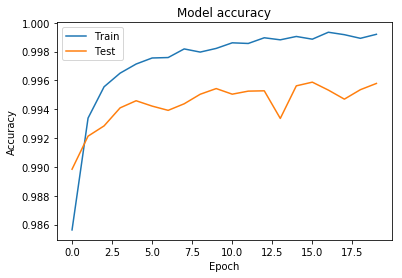

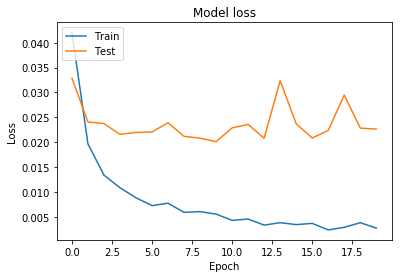

In [6]:
# batchsize = 64, epochs = 20
model1(batchsize = 64, epochs = 20)

Total Parameters：1149010
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 500)               392500    
_________________________________________________________________
activation_11 (Activation)   (None, 500)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 500)               250500    
_________________________________________________________________
activation_12 (Activation)   (None, 500)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 500)               250500    
_________________________________________________________________
activation_13 (Activation)   (None, 500)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 500)           

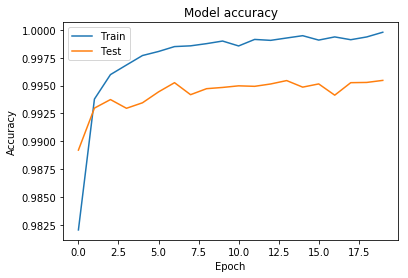

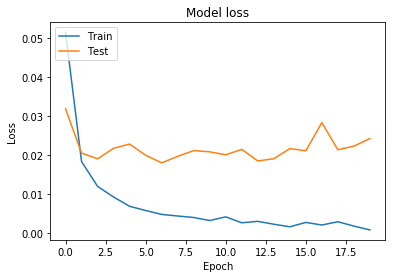

In [7]:
# batchsize = 256, epochs = 20
model1(batchsize = 256, epochs = 20)

Total Parameters：1149010
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 500)               392500    
_________________________________________________________________
activation_16 (Activation)   (None, 500)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 500)               250500    
_________________________________________________________________
activation_17 (Activation)   (None, 500)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 500)               250500    
_________________________________________________________________
activation_18 (Activation)   (None, 500)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 500)           

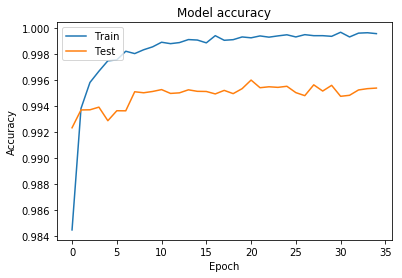

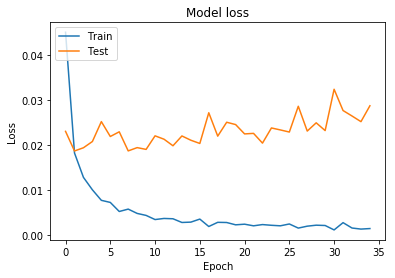

In [8]:
# batchsize = 128, epochs = 35
model1(batchsize = 128, epochs = 35)

Total Parameters：1149010
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 500)               392500    
_________________________________________________________________
activation_21 (Activation)   (None, 500)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 500)               250500    
_________________________________________________________________
activation_22 (Activation)   (None, 500)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 500)               250500    
_________________________________________________________________
activation_23 (Activation)   (None, 500)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 500)           

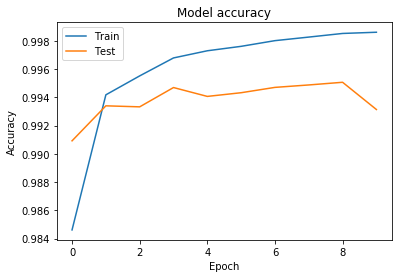

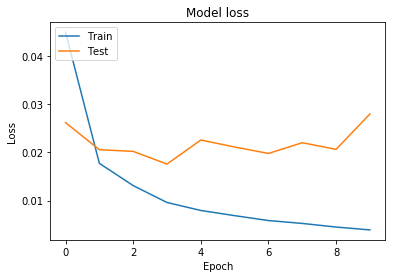

In [9]:
# batchsize = 128, epochs = 10
model1(batchsize = 128, epochs = 10)

## 比較結果

|batchsize| epochs| test loss                                | accuracy  |
|:--------|:-----:|-----------------------------------------:| ---------:|
|128      | 20 |  \[0.01910618396672362, 0.9963000118732452\] |  0.980800 | 
|64       | 20 |  \[0.017218774322573155, 0.9961500060558319\]  |  0.980700 | 
|256      | 20 | \[0.02036630371270803, 0.9957800114154816\]  |  0.978900 | 
|128      | 35 |  \[0.021230694525782495, 0.9964600098133087\] |  0.982000 | 
|128      | 10 |  \[0.02561820692884794, 0.9935600173473358\]  |  0.966800 | 

# (2)以同一模型, 分別驗證 SGD, Adam, Rmsprop 的 accurancy

Total Parameters：1149010
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 500)               392500    
_________________________________________________________________
activation_26 (Activation)   (None, 500)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 500)               250500    
_________________________________________________________________
activation_27 (Activation)   (None, 500)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 500)               250500    
_________________________________________________________________
activation_28 (Activation)   (None, 500)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 500)           

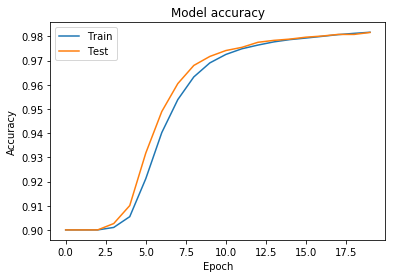

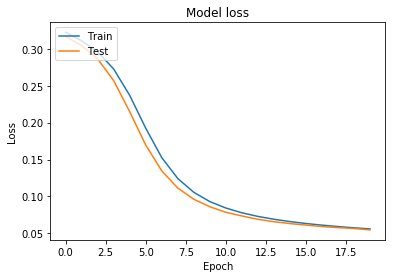

In [10]:
# optimizer = 'sgd'
model1(optimizer = 'sgd')

Total Parameters：1149010
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 500)               392500    
_________________________________________________________________
activation_31 (Activation)   (None, 500)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 500)               250500    
_________________________________________________________________
activation_32 (Activation)   (None, 500)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 500)               250500    
_________________________________________________________________
activation_33 (Activation)   (None, 500)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 500)           

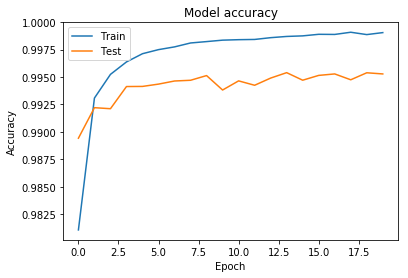

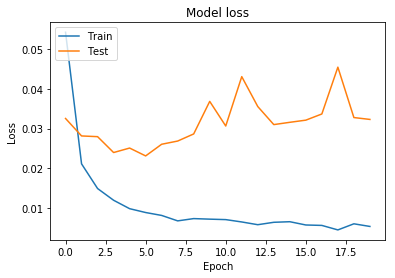

In [11]:
# optimizer = 'sgd'
model1(optimizer = 'rmsprop')

## 比較結果

|optimizer| test loss                                | accuracy  |
|:--------|-----------------------------------------:| ---------:|
|Adam     |  \[0.01910618396672362, 0.9963000118732452\] |  0.980800 | 
|SGD      |  \[0.053180363923311234, 0.9826700031757355\]  |  0.910700 | 
|Rmsprop  |\[0.026460371655156224, 0.9957400155067444\]  |  0.978200 | 


In [12]:
'''
 SGD(隨機梯度下降) - Arguments
lr: float >= 0. Learning rate.
momentum: float >= 0. Parameter that accelerates SGD in the relevant direction and dampens oscillations.
decay: float >= 0. Learning rate decay over each update.
nesterov: boolean. Whether to apply Nesterov momentum.
'''

'''
RMSprop- Arguments
lr: float >= 0. Learning rate.
rho: float >= 0.
epsilon: float >= 0. Fuzz factor. If None, defaults to K.epsilon().
decay: float >= 0. Learning rate decay over each update.
'''

'\nRMSprop- Arguments\nlr: float >= 0. Learning rate.\nrho: float >= 0.\nepsilon: float >= 0. Fuzz factor. If None, defaults to K.epsilon().\ndecay: float >= 0. Learning rate decay over each update.\n'